La `memoria conversacional` es lo que permite a los chatbots responder a sus consultas de manera conversacional. Permite conversaciones coherentes al considerar interacciones pasadas, en lugar de tratar cada consulta como independiente. Sin memoria conversacional, los chatbots carecerían de la capacidad de recordar y desarrollar interacciones anteriores.

De manera predeterminada, los agentes de chatbot no tienen estado, lo que significa que procesan cada consulta entrante como una entrada independiente, sin ningún conocimiento de interacciones anteriores. Solo se centran en la entrada actual y no retienen ninguna información de interacciones anteriores.

Sin embargo, en aplicaciones como los chatbots, es fundamental recordar interacciones pasadas. La memoria conversacional facilita esto al permitir que el agente recuerde y utilice información de conversaciones anteriores.

En resumen, la memoria conversacional es esencial para que los chatbots mantengan el contexto, recuerden interacciones pasadas y participen en conversaciones más significativas y coherentes con los usuarios.

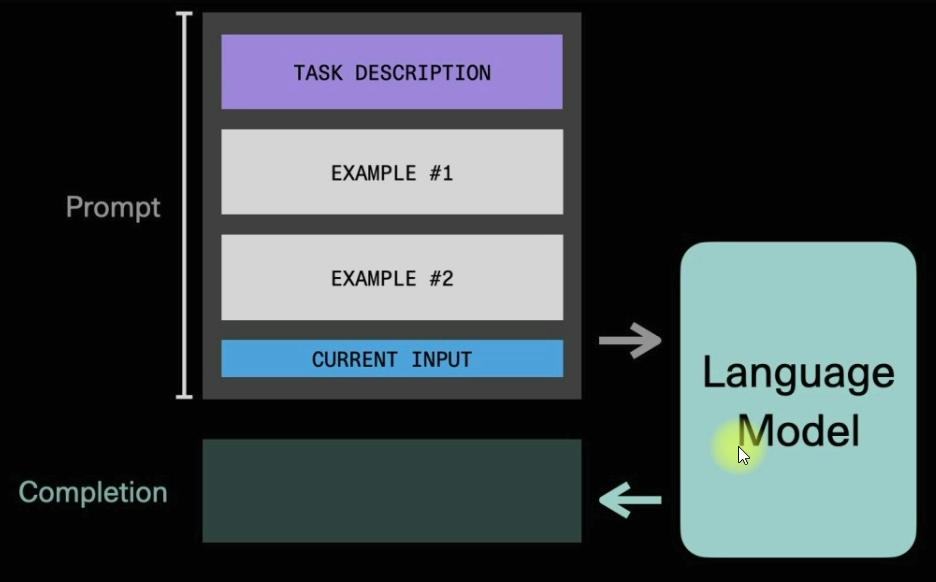

## 1. Librerías

In [ ]:
from langchain_core.runnables.history import RunnableWithMessageHistory # V.0.2
from langchain_core.chat_history import InMemoryChatMessageHistory # V.0.2
from langchain_openai import ChatOpenAI
from langchain.chains.conversation.memory import ConversationBufferMemory, ConversationSummaryMemory, ConversationBufferWindowMemory # V.0.1

import tiktoken
from langchain.memory import ConversationTokenBufferMemory

`Tiktoken`, desarrollado por OpenAI, es una herramienta que se utiliza para la tokenización de texto.

La *tokenización implica dividir un texto en unidades más pequeñas*, como letras o palabras. Tiktoken le permite contar tokens y estimar el costo de usar la API de OpenAI, que se basa en el uso de tokens. Utiliza *la codificación de pares de bytes (BPE)*, un algoritmo de compresión que reemplaza pares de bytes que ocurren con frecuencia con un solo byte.

En resumen, `Tiktoken` ayuda con el procesamiento de texto eficiente, el conteo de tokens y la estimación de costos basados ​​en la API de OpenAI.


**¿Qué es una memoria?**

Las cadenas y los agentes funcionan sin estado y tratan cada consulta de forma independiente. Sin embargo, en aplicaciones como los chatbots, es fundamental `recordar interacciones pasadas`. El concepto de "memoria" cumple esa función.    

## 2. Instanciar un Objeto de Modelo de Lenguaje de OpenAI (De Paga)

In [6]:
llm = ChatOpenAI(model= 'gpt-4o-mini', temperature= 0)

## 3. Tipos de Memoria

### *3.1. ConversationBufferMemory*

Imagina que estás conversando con alguien y quieres recordar lo que has hablado hasta ahora. 

La memoria `ConversationBufferMemory` hace exactamente eso en un chatbot o sistema similar. Mantiene un registro, o `buffer`, de las partes pasadas de la conversación. 

Este buffer es una parte esencial del contexto, que ayuda al chatbot a generar mejores respuestas. Lo único de esta memoria es que almacena la conversación anterior exactamente como era, sin ningún cambio.

Conserva la forma original de la conversación, lo que permite al chatbot volver a consultar partes específicas con precisión. En resumen, la memoria ConversationBufferMemory ayuda al chatbot a recordar el historial de la conversación, lo que mejora la experiencia conversacional en general. 


- ***Ventajas***

	- **Historial de Conversaciones Completo:** Conserva todo el historial de conversaciones, lo que garantiza un contexto completo para el chatbot.

	- **Referencias Precisas:** Al almacenar extractos de conversaciones en su forma original, permite hacer referencias precisas a interacciones pasadas, lo que mejora la precisión.

	- **Comprensión Contextual:** La forma original conservada de la conversación ayuda al chatbot a mantener una comprensión profunda del diálogo en curso.

	- **Respuestas Mejoradas:** Con acceso al historial de conversaciones completo, el chatbot puede generar respuestas más relevantes y coherentes.

- ***Desventajas***

	- **Mayor Uso de Memoria:** Almacenar todo el historial de conversaciones consume recursos de memoria, lo que puede generar limitaciones de memoria.

	- **Posible Impacto en el Rendimiento:** Los búferes de conversación grandes pueden ralentizar los tiempos de procesamiento y respuesta, lo que afecta el rendimiento general del sistema.

	- **Escalabilidad Limitada:** A medida que la conversación crece, los requisitos de memoria y la carga de procesamiento pueden volverse poco prácticos para conversaciones extremadamente largas.

	- **Preocupaciones de Privacidad:** Almacenar todo el historial de conversaciones plantea problemas de privacidad, ya que es posible que se conserve información confidencial o personal en el búfer.

In [26]:
store = {} # Aquí almacenaremos los datos de la conversación.

In [27]:
# Función para obtener el historial de la conversación.
def get_session_history(session_id: str) -> InMemoryChatMessageHistory:
	if session_id not in store:
		store[session_id] = InMemoryChatMessageHistory()
	return store[session_id]

In [28]:
conversacion = RunnableWithMessageHistory(
    runnable= llm,
    get_session_history= get_session_history # Nos permite recordar las últimas interacciones.
)

In [29]:
print(conversacion.invoke("Hola, ¿cómo estás?", config= {"session_id": "1"}))

content='¡Hola! Estoy aquí y listo para ayudarte. ¿En qué puedo asistirte hoy?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 13, 'total_tokens': 32, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None} id='run-6c03eb61-fa8f-4e71-bcc9-ee62aeaf2c9a-0' usage_metadata={'input_tokens': 13, 'output_tokens': 19, 'total_tokens': 32, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [31]:
print(conversacion.invoke("Mi nombre es Martin", config= {"session_id": "1"}))

content='¡Hola, Martín! Es un placer conocerte. ¿En qué puedo ayudarte hoy?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 43, 'total_tokens': 62, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None} id='run-96e6d0f9-9f9f-420a-9883-3e536060e402-0' usage_metadata={'input_tokens': 43, 'output_tokens': 19, 'total_tokens': 62, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [35]:
print(conversacion.invoke("¿Cual es mi nombre?", config= {"session_id": "1"}))

content='Tu nombre es Martín. ¿Hay algo más en lo que te gustaría hablar o preguntar?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 76, 'total_tokens': 95, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None} id='run-d2f00522-782c-403d-9082-f3b3694f9bab-0' usage_metadata={'input_tokens': 76, 'output_tokens': 19, 'total_tokens': 95, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [ ]:
store

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hola, ¿cómo estás?', additional_kwargs={}, response_metadata={}), AIMessage(content='¡Hola! Estoy aquí y listo para ayudarte. ¿En qué puedo asistirte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 13, 'total_tokens': 32, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-6c03eb61-fa8f-4e71-bcc9-ee62aeaf2c9a-0', usage_metadata={'input_tokens': 13, 'output_tokens': 19, 'total_tokens': 32, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='Mi nombre es Martin', additional_kwargs={}, response_metada